In [1]:
import pandas as pd
from rdkit import Chem
import rdkit.Chem.AllChem as AllChem
from rdkit.Chem import PandasTools
from rdkit import DataStructs
import numpy as np

In [2]:
#train:smiles2mol2fingerprint
data=pd.read_csv("data_processed.csv",encoding="gbk")
#Reactant_mols = []
dataframe = pd.DataFrame({'Product':data['prod_smiles'][range(1000)],'Rxn':data['rxn_smiles'][range(1000)]})
dataframe.to_csv('data_train.csv',index=False)
dataframe_test = pd.DataFrame({'Product':data['prod_smiles'][1001:1501],'Rxn':data['rxn_smiles'][1001:1501]})
dataframe_test.to_csv('data_test.csv',index=False)

Product_mols = []
df=pd.read_csv("data_train.csv",encoding="gbk")
for i in df['Product']:
    Product_mol = Chem.MolFromSmiles(i)
    Product_mols.append(Product_mol)
mfps = []
for i in Product_mols:
    mfp = AllChem.GetMorganFingerprint(i,2,useFeatures=True)
    mfps.append(mfp)

In [3]:
#test:smiles2mol2fingerprint
df_1=pd.read_csv("data_test.csv",encoding="gbk")
#product_smiles = 'O=[N+]([O-])NC1=NN=C(N[N+](=O)[O-])N=N1'
#product_smiles = 'O=[N+]([O-])N1CN([N+](=O)[O-])CN([N+](=O)[O-])CN([N+](=O)[O-])C1'
#product_smiles = 'CC(=O)N1CN(C(C)=O)CN([N+](=O)[O-])CN(C(C)=O)C1'
#product_smiles = 'CC(=O)N1CN(C(C)=O)CN([N+](=O)[O-])CN(C(C)=O)C1'
product_smiles = df_1['Product'][2]
product_mol = Chem.MolFromSmiles(product_smiles)
product_mfp = AllChem.GetMorganFingerprint(product_mol,2,useFeatures=True)
    

In [4]:
#similarity
s_prods = []
for i in mfps:
    s_prod = DataStructs.TanimotoSimilarity(product_mfp,i)
    s_prods.append(s_prod)
#print(s_prods)
index = np.argsort(s_prods)[::-1]
#print(index)
print(len(index))

1000


In [5]:
#extract_template
import rdchiral
from rdchiral import template_extractor
templates = []
for i in index:
    #rxnmapped = data['Rxnmapped'][i]
    rxnmapped = data['rxn_smiles'][i]
    reaction = {
    'reactants': rxnmapped.split('>')[0],
    'products': rxnmapped.split('>')[-1],
    '_id': i,
    }
    template = template_extractor.extract_from_reaction(reaction)
    templates.append(template)
print(templates)
print(len(templates))
display(templates[0]['reaction_smarts'])
print('---------------------------')
rxn_template = []
n = 0
for i in templates:
    if i is None or 'reaction_smarts' not in i:
        rxn_smarts = None
        n += 1
        #print(rxn_smarts)
        #print(i['reaction_id'])
        rxn_template.append(rxn_smarts)
        continue
    rxn_smarts = '(' + i['reaction_smarts'].replace('>>', ')>>')
    print(rxn_smarts)
    #print(i['reaction_id'])
    rxn_template.append(rxn_smarts)
print(len(rxn_template))
print("number of invalid templates is %d" %n)


[{'products': '[#7:4]-[C:3]-[CH;D3;+0:1](-[C:2])-[O;H0;D2;+0:5]-[c:6]', 'reactants': 'O-[CH;D3;+0:1](-[C:2])-[C:3]-[#7:4].[OH;D1;+0:5]-[c:6]', 'reaction_smarts': '[#7:4]-[C:3]-[CH;D3;+0:1](-[C:2])-[O;H0;D2;+0:5]-[c:6]>>O-[CH;D3;+0:1](-[C:2])-[C:3]-[#7:4].[OH;D1;+0:5]-[c:6]', 'intra_only': False, 'dimer_only': False, 'reaction_id': 920, 'necessary_reagent': ''}, {'products': '[C:4]-[NH;D2;+0:5]-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3]', 'reactants': 'F-C(-F)(-F)-C-O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3].[C:4]-[NH2;D1;+0:5]', 'reaction_smarts': '[C:4]-[NH;D2;+0:5]-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3]>>F-C(-F)(-F)-C-O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3].[C:4]-[NH2;D1;+0:5]', 'intra_only': False, 'dimer_only': False, 'reaction_id': 67, 'necessary_reagent': ''}, {'products': '[F;D1;H0:3]-[C:2](-[F;D1;H0:4])(-[F;D1;H0:5])-[CH2;D2;+0:1]-[S;H0;D2;+0:6]-[c:7]', 'reactants': 'Cl-[CH2;D2;+0:1]-[C:2](-[F;D1;H0:3])(-[F;D1;H0:4])-[F;D1;H0:5].[SH;D1;+0:6]-[c:7]', 'reaction_smarts': '[F;D1;H0:3]-[C:2](-[F;D1;H0:4

'[#7:4]-[C:3]-[CH;D3;+0:1](-[C:2])-[O;H0;D2;+0:5]-[c:6]>>O-[CH;D3;+0:1](-[C:2])-[C:3]-[#7:4].[OH;D1;+0:5]-[c:6]'

---------------------------
([#7:4]-[C:3]-[CH;D3;+0:1](-[C:2])-[O;H0;D2;+0:5]-[c:6])>>O-[CH;D3;+0:1](-[C:2])-[C:3]-[#7:4].[OH;D1;+0:5]-[c:6]
([C:4]-[NH;D2;+0:5]-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3])>>F-C(-F)(-F)-C-O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3].[C:4]-[NH2;D1;+0:5]
([F;D1;H0:3]-[C:2](-[F;D1;H0:4])(-[F;D1;H0:5])-[CH2;D2;+0:1]-[S;H0;D2;+0:6]-[c:7])>>Cl-[CH2;D2;+0:1]-[C:2](-[F;D1;H0:3])(-[F;D1;H0:4])-[F;D1;H0:5].[SH;D1;+0:6]-[c:7]
([#7;a:2]:[c;H0;D3;+0:1](:[c:3])-[N;H0;D3;+0:5](-[C:4])-[C:6])>>Cl-[c;H0;D3;+0:1](:[#7;a:2]):[c:3].[C:4]-[NH;D2;+0:5]-[C:6]
([C:4]-[N;H0;D3;+0:5](-[C:6])-[CH;D3;+0:1](-[C;D1;H3:2])-[C;D1;H3:3])>>O=[C;H0;D3;+0:1](-[C;D1;H3:2])-[C;D1;H3:3].[C:4]-[NH;D2;+0:5]-[C:6]
([C:2]#[CH;D1;+0:1])>>C-[Si](-C)(-C)-[C;H0;D2;+0:1]#[C:2]
([C:4]-[N;H0;D3;+0:5](-[C:6])-[c;H0;D3;+0:1](:[c:2]):[c:3])>>F-[c;H0;D3;+0:1](:[c:2]):[c:3].[C:4]-[NH;D2;+0:5]-[C:6]
([C:2]-[C;H0;D4;+0:1](-[C;D1;H3:3])(-[NH2;D1;+0:6])-[C;H0;D2;+0:4]#[N;D1;H0:5])>>O=[C;H0;D3;+0:1](-[C:2])-[C;D1;H3:3].[C-;H0;D1

In [6]:
#propose_precursors
from rdkit.Chem import rdChemReactions
from rdchiral.main import rdchiralReactants, rdchiralReaction, rdchiralRun
rct = rdchiralReactants(product_smiles)
rxns = []
precursors = []
n=0
for i in rxn_template: 
    if i is None:
        print('------------------------------')
        print("invalid rxn_template")
        print('------------------------------')
        rxn = None
        rxns.append(rxn)
        continue
    rxn_i = AllChem.ReactionFromSmarts(i)
    num_r = rxn_i.GetNumReactantTemplates()
    num_p = rxn_i.GetNumProductTemplates()
    n += 1
    #print(num_r, num_p, n)
    #print('------------------------------')
    rxn = rdchiralReaction(i)
    rxns.append(rxn)
    #print(rxns)
#print('##############################')
for i in rxns:
    if i is None:
        precursor = None
        precursors.append(precursor)
        print(precursor)
        continue
    precursor = rdchiralRun(i, rct, combine_enantiomers=False)
    precursors.append(precursor)
    print(precursor)
print(len(precursors))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Fc1ccc(OC(F)(F)F)cc1.OC1CCNCC1', 'Fc1ccc(OC2CCNCC2)cc1.OC(F)(F)F']
['FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1']
['CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1']
[]
[]
['NCCC(CCI)Oc1ccc(OC(F)(F)F)cc1']
[]
[]
[]
[]
[]
['CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1']
[]
[]
[]
['CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1']
[]
[]
[]
[]
['CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1']
[]
['CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1']
[]
['O=C1CC(Oc2ccc(OC(F)(F)F)cc2)CCN1']
['Fc1ccc(OC(F)(F)F)cc1.OC1CCNCC1', 'Fc1ccc(OC2CCNCC2)cc1.OC(F)(F)F']
['O=C(OCc1ccccc1)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1']
[]
[]
[]
[]
[]
['FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1']
[]
[]
[]
[]
[]
[]
[]
[]
['CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['CS(=O)(=O)OCCC(CCN)Oc1ccc(OC(F)(F)F)cc1']
[]
[]
[]
[]
[]
[]
[]
['CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1']
[]
[]
[]
[]
['CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1']
[]
[]
[]
[]
['FC(F)

In [7]:
"""#precursors
from rdchiral.main import rdchiralReactants, rdchiralReaction, rdchiralRun
rct = rdchiralReactants(product_smiles)
rxn = rdchiralReaction(templates[25]['reaction_smarts'])
print(rxn)
precursor = rdchiralRun(rxn, rct, combine_enantiomers=False)
print(precursor)"""

"#precursors\nfrom rdchiral.main import rdchiralReactants, rdchiralReaction, rdchiralRun\nrct = rdchiralReactants(product_smiles)\nrxn = rdchiralReaction(templates[25]['reaction_smarts'])\nprint(rxn)\nprecursor = rdchiralRun(rxn, rct, combine_enantiomers=False)\nprint(precursor)"

In [8]:
"""#precursors
from rdchiral.main import rdchiralReactants, rdchiralReaction, rdchiralRun
rct = rdchiralReactants(product_smiles)
rxn = rdchiralReaction(templates[1]['reaction_smarts'])
print(rxn)
precursor = rdchiralRun(rxn, rct, combine_enantiomers=False)
print(precursor)"""

"#precursors\nfrom rdchiral.main import rdchiralReactants, rdchiralReaction, rdchiralRun\nrct = rdchiralReactants(product_smiles)\nrxn = rdchiralReaction(templates[1]['reaction_smarts'])\nprint(rxn)\nprecursor = rdchiralRun(rxn, rct, combine_enantiomers=False)\nprint(precursor)"

smiles is ok


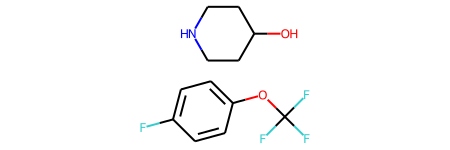

Fc1ccc(OC(F)(F)F)cc1.OC1CCNCC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


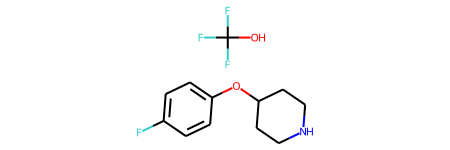

Fc1ccc(OC2CCNCC2)cc1.OC(F)(F)F>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


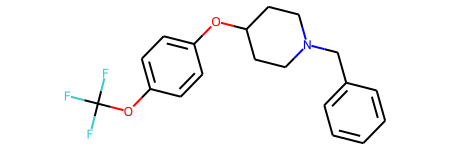

FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


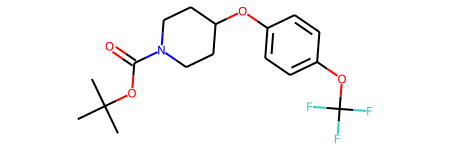

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


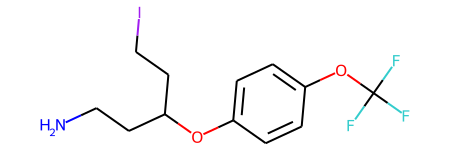

NCCC(CCI)Oc1ccc(OC(F)(F)F)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


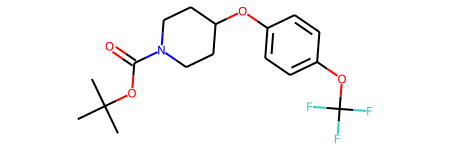

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


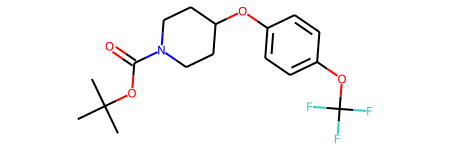

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


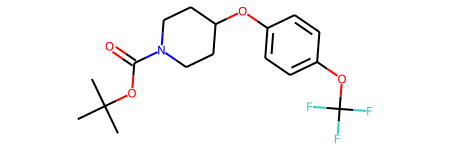

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


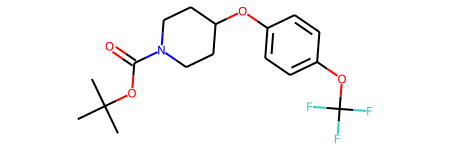

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


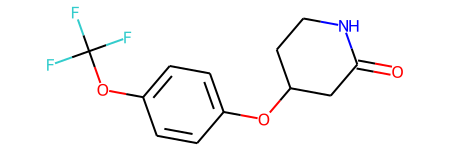

O=C1CC(Oc2ccc(OC(F)(F)F)cc2)CCN1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


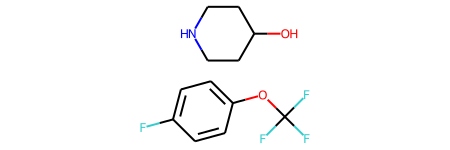

Fc1ccc(OC(F)(F)F)cc1.OC1CCNCC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


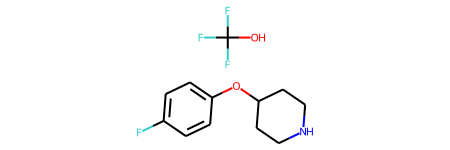

Fc1ccc(OC2CCNCC2)cc1.OC(F)(F)F>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


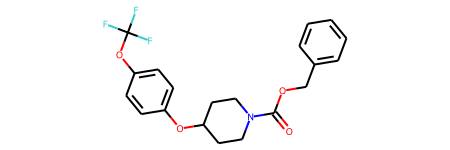

O=C(OCc1ccccc1)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


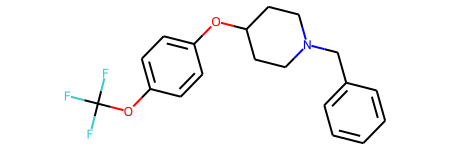

FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


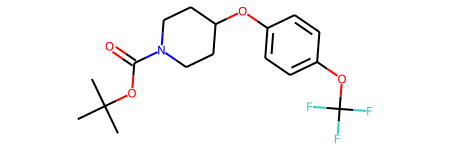

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


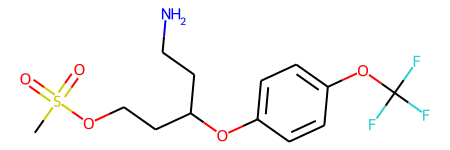

CS(=O)(=O)OCCC(CCN)Oc1ccc(OC(F)(F)F)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


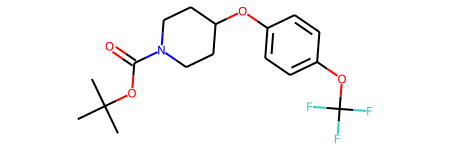

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


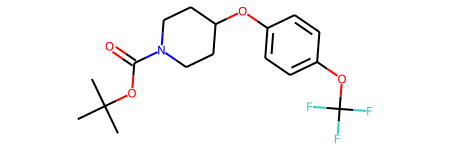

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


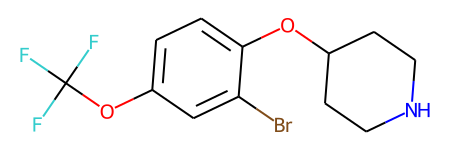

FC(F)(F)Oc1ccc(OC2CCNCC2)c(Br)c1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


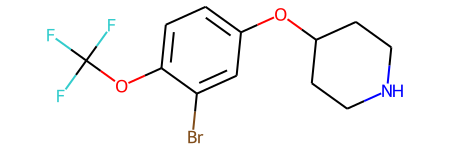

FC(F)(F)Oc1ccc(OC2CCNCC2)cc1Br>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


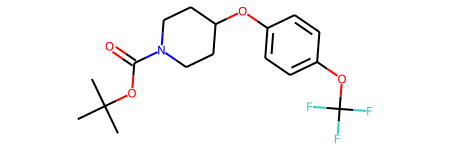

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


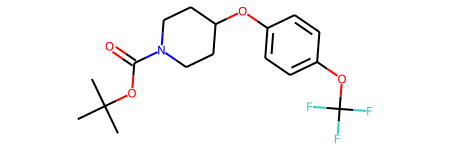

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


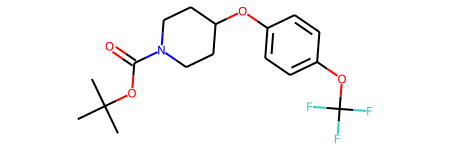

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


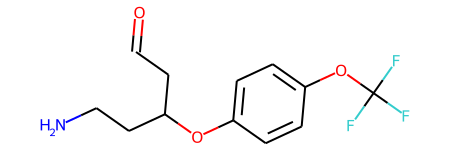

NCCC(CC=O)Oc1ccc(OC(F)(F)F)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


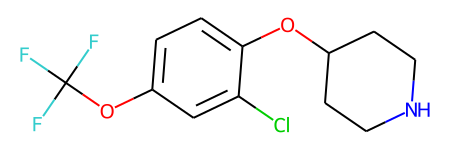

FC(F)(F)Oc1ccc(OC2CCNCC2)c(Cl)c1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


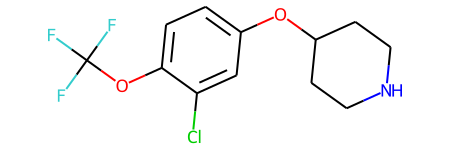

FC(F)(F)Oc1ccc(OC2CCNCC2)cc1Cl>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


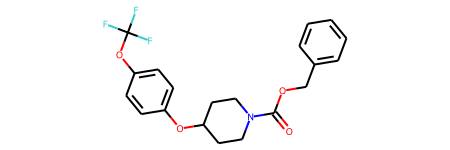

O=C(OCc1ccccc1)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


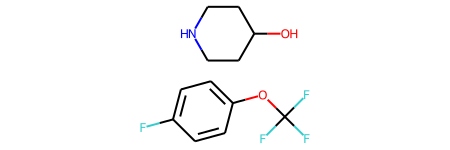

Fc1ccc(OC(F)(F)F)cc1.OC1CCNCC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


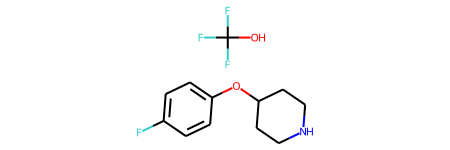

Fc1ccc(OC2CCNCC2)cc1.OC(F)(F)F>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


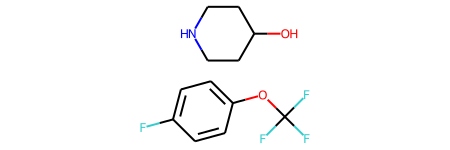

Fc1ccc(OC(F)(F)F)cc1.OC1CCNCC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


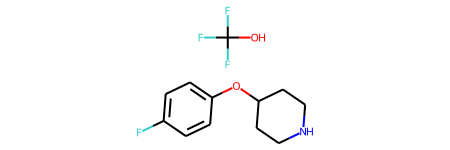

Fc1ccc(OC2CCNCC2)cc1.OC(F)(F)F>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


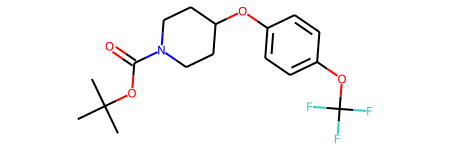

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


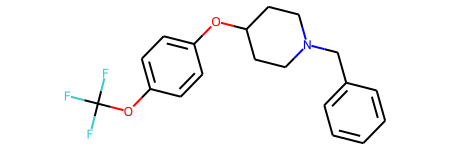

FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


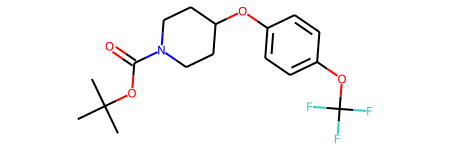

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


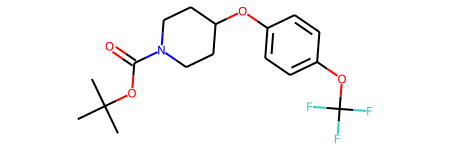

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


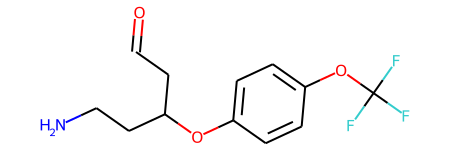

NCCC(CC=O)Oc1ccc(OC(F)(F)F)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


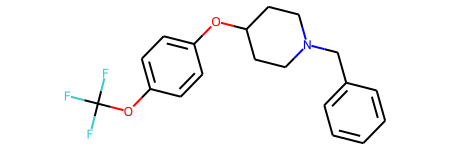

FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


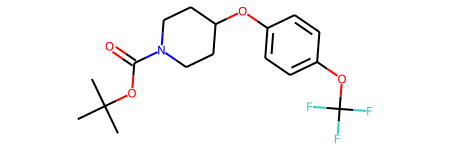

CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


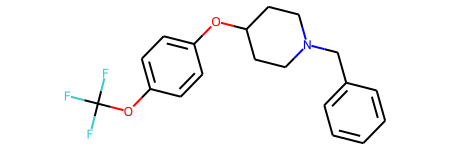

FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
smiles is ok


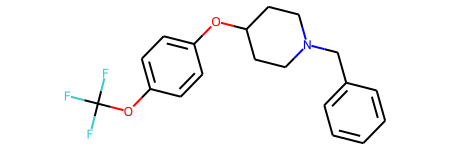

FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1
[None, None, None, None, None, None, None, None, None, None, 'Fc1ccc(OC(F)(F)F)cc1.OC1CCNCC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', 'Fc1ccc(OC2CCNCC2)cc1.OC(F)(F)F>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', 'FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', 'CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', None, None, 'NCCC(CCI)Oc1ccc(OC(F)(F)F)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', None, None, None, None, None, 'CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', None, None, None, 'CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', None, None, None, None, 'CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', None, 'CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', None, 'O=C1CC(Oc2ccc(OC(F)(F)F)cc2)CCN1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', 'Fc1ccc(OC(F)(F)F)cc1.OC1CCNCC1>>FC(F)(F)Oc1ccc(OC2CC

------------------------------
[(920, None), (67, None), (405, None), (961, None), (508, None), (407, None), (981, None), (495, None), (297, None), (332, None), (181, 'Fc1ccc(OC(F)(F)F)cc1.OC1CCNCC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1'), (181, 'Fc1ccc(OC2CCNCC2)cc1.OC(F)(F)F>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1'), (20, 'FC(F)(F)Oc1ccc(OC2CCN(Cc3ccccc3)CC2)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1'), (74, 'CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1'), (619, None), (266, None), (565, 'NCCC(CCI)Oc1ccc(OC(F)(F)F)cc1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1'), (798, None), (17, None), (189, None), (875, None), (447, None), (554, 'CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1'), (63, None), (721, None), (130, None), (542, 'CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1'), (854, None), (741, None), (990, None), (231, None), (863, 'CC(C)(C)OC(=O)N1CCC(Oc2ccc(OC(F)(F)F)cc2)CC1>>FC(F)(F)Oc1ccc(OC2CCNCC2)cc1'), (401, None), (274, 'CC(C)(C)O

In [9]:
rxns =[]
coindexs = []
for idx,i in enumerate(precursors):
    if len(i) ==0 or i is None:
        rxnstr = None
        rxns.append(rxnstr)
        coindex = index[idx]
        coindexs.append(coindex)
        #print('------------------------------')
        #print("this reaction could not propose suitable smiles")
        #print('------------------------------')
        continue
    for j in i:
        m = Chem.MolFromSmiles(j,sanitize=False)
        if m is None:
            print('invalid smiles')
            rxnstr = None
            rxns.append(rxnstr)
            coindex = index[idx]
            coindexs.append(coindex)
        else:
            try:
                Chem.SanitizeMol(m)
                print("smiles is ok")
                display(m)
                rxnstr=j +'>>'+product_smiles
                print(rxnstr)
                rxns.append(rxnstr)
                coindex = index[idx]
                coindexs.append(coindex)
                
            except:
                print('invalid chemistry')
                rxnstr = None
                rxns.append(rxnstr)
                coindex = index[idx]
                coindexs.append(coindex) 
print(rxns)
print(len(rxns))
#print(coindexs)
print(len(coindexs))
repeat_indexs = []
t = {}
for i in range(len(coindexs)):
    for j in range(i):
         if coindexs[i] == coindexs[j]:
            repeat_index = coindexs[j]
            print(repeat_index)
            repeat_indexs.append(repeat_index)
print('------------------------------')
t = list(zip(coindexs,rxns))
print(t)
print(len(t))

In [10]:
df_1=pd.read_csv("data_test.csv",encoding="gbk")
remove_prod_smiles = []
remove_rcts_smiles = []
remove_rxns_smiles = []

for rxn_smi in df_1['Rxn']:
    prod_smi = rxn_smi.split('>>')[-1]
    prod_mol = Chem.MolFromSmiles(prod_smi)
    [atom.ClearProp('molAtomMapNumber') for atom in prod_mol.GetAtoms()]
    prod_smi_remove_atom_map = Chem.MolToSmiles(prod_mol, True)
    # Sometimes stereochem takes another canonicalization...
    prod_smi_remove_atom_map = Chem.MolToSmiles(Chem.MolFromSmiles(prod_smi_remove_atom_map), True)
    remove_prod_smiles.append(prod_smi_remove_atom_map)      
for rxn_smi in df_1['Rxn']:
    rcts_smi = rxn_smi.split('>>')[0]
    rcts_mol = Chem.MolFromSmiles(rcts_smi)
    [atom.ClearProp('molAtomMapNumber') for atom in rcts_mol.GetAtoms()]
    rcts_smi_remove_atom_map = Chem.MolToSmiles(rcts_mol, True)
    # Sometimes stereochem takes another canonicalization...
    rcts_smi_remove_atom_map = Chem.MolToSmiles(Chem.MolFromSmiles(rcts_smi_remove_atom_map), True)
    remove_rcts_smiles.append(rcts_smi_remove_atom_map)            
    
    rxn_smi_remove_atom_map = rcts_smi_remove_atom_map + '>>' + prod_smi_remove_atom_map
    remove_rxns_smiles.append(rxn_smi_remove_atom_map) 
print(remove_prod_smiles)
print('***********************')
print(remove_rcts_smiles)
print('***********************')
print(remove_rxns_smiles)    
dataframe_test_remove = pd.DataFrame({'Product':remove_prod_smiles[:],'Reactant':remove_rcts_smiles[:],'Rxn':remove_rxns_smiles[:]})
dataframe_test_remove.to_csv('remove_data_test.csv',index=False)

['CC(=O)Nc1ccc(-c2cc3[nH]c(=O)[nH]c3nc2C)cc1', 'CC(C)CCNc1ncc[nH]1', 'FC(F)(F)Oc1ccc(OC2CCNCC2)cc1', 'CCCOC(=O)Cc1c2n(c3ccccc13)CC(n1cc(Cc3ccccc3)nn1)CC2', 'C=C(c1cc(Cl)c(OC(F)F)c(Cl)c1)C(F)(F)F', 'CCCCCCCCN=[N+]=[N-]', 'CN(Cc1ccccc1-c1ccccc1)C(=O)CCCSc1ccc(O)cc1', 'O=C1c2ccccc2C(=O)N1CCCCN1CCN2c3ccccc3Cc3ccccc3[C@@H]2C1', 'CCOC(=O)c1csc(C#Cc2cc(OC)c(OC)c(OC)c2)n1', 'CC(C)(C)OC(=O)N1CCC(=Cc2ccc([N+](=O)[O-])c(Cl)c2)CC1', 'COc1cc2c(-c3cc4cc(F)cnc4n3S(=O)(=O)c3ccc(C)cc3)cn(CCN3CCOCC3)c2cc1OC', 'c1cncc(Cc2cccs2)c1', 'CCCCC(CC(=O)O)c1sc2cc(OC)ccc2c1C', 'CC(C)(C)OC(=O)Nc1ccc(N2CCC[C@@H](C(=O)N3CCCC3)C2)nc1N', 'CN(C(=O)c1ccc(Cl)cc1)[C@@H]1CN(C(=O)C2CCN(C(=O)CO)CC2)C[C@H]1c1ccc(Cl)c(Cl)c1', 'CC(C)C(=O)Nc1cccc(C2CCN(CCCCNC(=O)c3cccc(Cl)c3)CC2)c1', 'N#Cc1cnc2ccc(NCc3cccc([N+](=O)[O-])c3)cc2c1Nc1ccc(F)c(Cl)c1', 'CC(C)(C)OC(=O)N1CCC[C@H](Nc2ncnc3c2nc(-c2ccccc2Cl)n3-c2ccc(Cl)cc2)C1', 'O=S(=O)(CC(F)(F)F)c1ccc(-c2ccc3cc(O)ccc3c2Oc2ccc(OCCN3CCCCC3)cc2)cc1', 'CCCCOc1ccc(CCNCc2ccccc2)cc1', 'CC(C)C(C(=O

In [11]:
Reactant_smiles = []
Reactant_mols = []
for rxn_smi in df['Rxn']:
    rcts_smi = rxn_smi.split('>>')[0]
    rcts_mol = Chem.MolFromSmiles(rcts_smi)
    [atom.ClearProp('molAtomMapNumber') for atom in rcts_mol.GetAtoms()]
    Reactant_smile = Chem.MolToSmiles(rcts_mol, True)
    Reactant_smiles.append(Reactant_smile)
    # Sometimes stereochem takes another canonicalization...
    Reactant_mol = Chem.MolFromSmiles(Reactant_smile, True)
    Reactant_mols.append(Reactant_mol)   

In [12]:
s_reacs =[]
ss=[]
for x in index:
    for k,v in t:
        if k == x:
            #print(k)
            
            if v is None:
                #print(v)
                s_reac = 0
                s_reacs.append(s_reac)
                s = 0
                ss.append(s)
                continue
            else:
                i = str(v).split('>>')[0]
                #print(i)
                Proposal_mol = Chem.MolFromSmiles(i)
                if Proposal_mol is None:
                    s_reac = 0
                    s_reacs.append(s_reac)
                    s = 0
                    ss.append(s)
                    continue
                mfp_proposal = AllChem.GetMorganFingerprint(Proposal_mol,2,useFeatures=True)
                mfp_Reactant_mol = AllChem.GetMorganFingerprint(Reactant_mols[x],2,useFeatures=True)
                s_reac = DataStructs.TanimotoSimilarity(mfp_Reactant_mol, mfp_proposal)
                s_reacs.append(s_reac)
                s = s_reac*s_prods[x]
                ss.append(s)
print(ss)
order = np.argsort(ss)[::-1]
print(order)
print(len(ss))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1274092970521542, 0.12894434882386688, 0.1603960396039604, 0.15309278350515465, 0, 0, 0.11762085096903542, 0, 0, 0, 0, 0, 0.13636363636363635, 0, 0, 0, 0.1346987951807229, 0, 0, 0, 0, 0.13333333333333333, 0, 0.1268041237113402, 0, 0.10569663692518874, 0.09103641456582634, 0.08305647840531562, 0.12955927051671734, 0, 0, 0, 0, 0, 0.12511584800741427, 0, 0, 0, 0, 0, 0, 0, 0, 0.10673927842069435, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09057391304347827, 0, 0, 0, 0, 0, 0, 0, 0.09968115455613359, 0, 0, 0, 0, 0.09787444389520515, 0, 0, 0, 0, 0.07422402159244264, 0.07422402159244264, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.08851224105461393, 0, 0, 0, 0, 0, 0, 0, 0.09482758620689656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0958904109589041, 0, 0, 0, 0, 0, 0, 0.06564275194613928, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[0 1 1 ... 1 1 1]


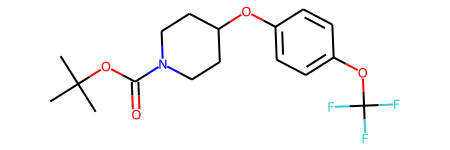

In [13]:
df_2 = pd.read_csv("remove_data_test.csv",encoding="gbk")
true_precursors = df_2['Reactant'][2]
#true_precursors = 'CC(=O)N1CN(C(C)=O)CN(C(C)=O)CN(C(C)=O)C1.O=[N+]([O-])O[N+](=O)[O-]'
accuracy = []
for i,j in enumerate(order):
    if rxns[j] is None:
        continue
    x = rxns[j].split('>>')[0]
    if x == true_precursors:
        a = np.zeros(i,dtype = int)
        b = np.ones(len(order)-i,dtype = int)
        accuracy = np.concatenate((a,b))
        break
print(accuracy)

m = Chem.MolFromSmiles(true_precursors)
display(m)